In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import datetime as dt

In [4]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
data.rename({' Income ' : 'Income'}, axis = 1, inplace = True)

data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype(float)

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [11]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [12]:
data['Customer_Age_When_Enrolled'] = data['Dt_Customer'].dt.year - data['Year_Birth']

In [13]:
data[data['Customer_Age_When_Enrolled'] >= 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,113


In [14]:
data['Total Spent'] = (data['MntFishProducts'] + data['MntWines'] + data['MntSweetProducts']
                       + data['MntFruits'] + data['MntMeatProducts'] + data['MntGoldProds'] )

In [15]:
data['Total Purchases'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumStorePurchases'] +
                            data['NumCatalogPurchases'])

In [16]:
data['Kids_Teen_at_home'] = data['Kidhome'] + data['Teenhome']
data = data.drop(['Kidhome', 'Teenhome'], axis = 1)

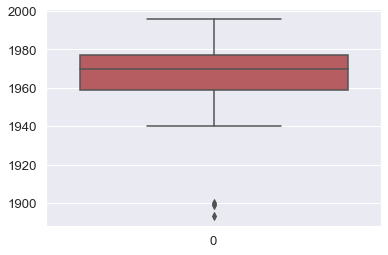

In [17]:
sns.boxplot(data = data['Year_Birth'], color = 'r')

In [18]:
data = data[data['Year_Birth'] >= 1920]

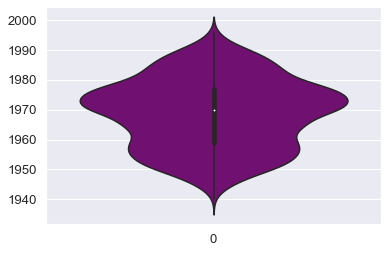

In [19]:
sns.violinplot(data = data['Year_Birth'], color = 'purple')

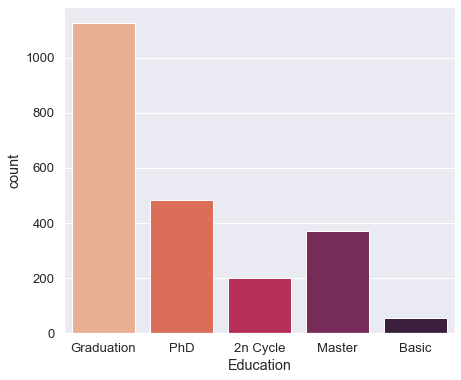

In [20]:
plt.figure(figsize = (7, 6))
sns.countplot(x = data['Education'], palette = 'rocket_r')

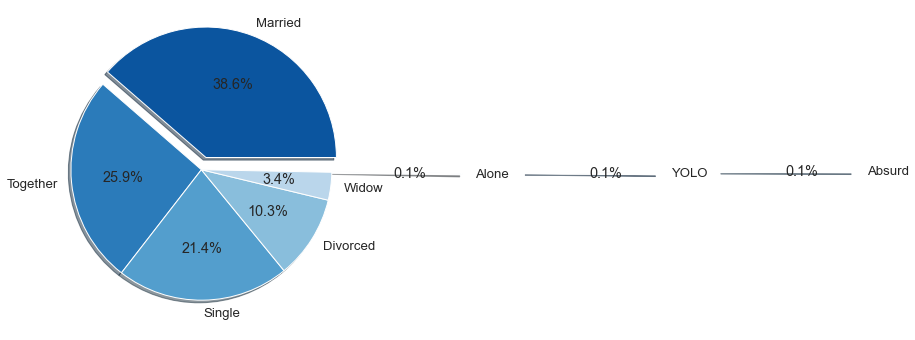

In [21]:
m = data['Marital_Status'].value_counts().to_frame('Count')

sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(m['Count'], labels = m.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), shadow = True, autopct = '%1.1f%%')
plt.show()

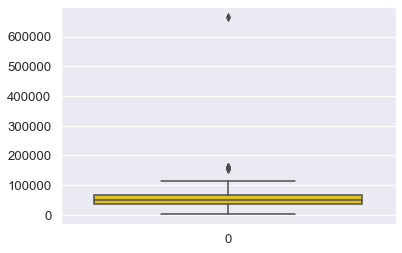

In [22]:
sns.boxplot(data = data['Income'], color = 'gold')

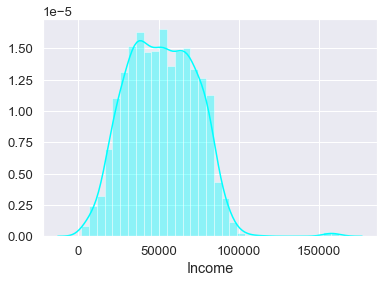

In [23]:
data = data[data['Income'] < 200000]
sns.distplot(data['Income'], color = 'aqua')

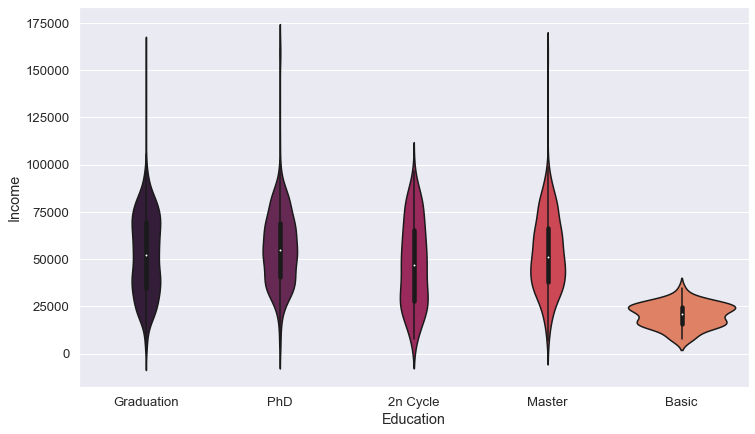

In [24]:
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(y = data['Income'], x = data['Education'])

Text(0.5, 0, 'Amount Spent on Gold')

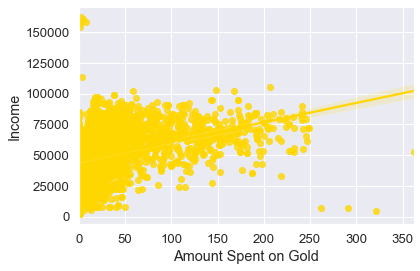

In [26]:
sns.regplot(x = data['MntGoldProds'], y = data['Income'], color = 'gold')
plt.xlabel('Amount Spent on Gold')

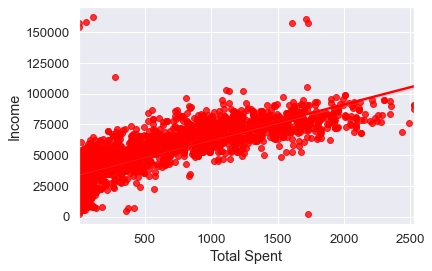

In [27]:
sns.regplot(x = data['Total Spent'], y = data['Income'], color = 'red')

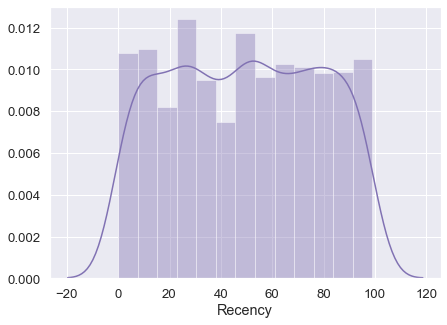

In [28]:
plt.figure(figsize = (7, 5))
sns.distplot(data['Recency'], color = 'm')

Text(0.5, 0, 'Customer Age When Enrolled')

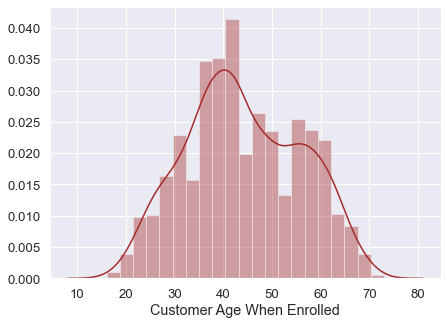

In [29]:
plt.figure(figsize = (7, 5))
sns.distplot(data['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlabel('Customer Age When Enrolled')

Text(0, 0.5, 'No. of Customers')

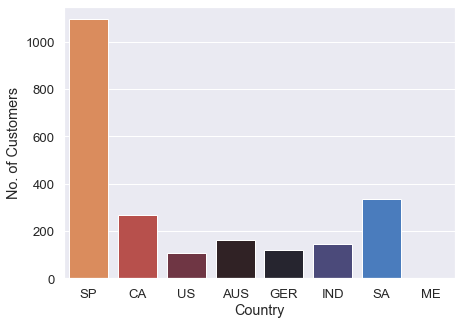

In [30]:
plt.figure(figsize = (7, 5))
sns.countplot(x = data['Country'], palette = 'icefire_r')
plt.ylabel('No. of Customers')

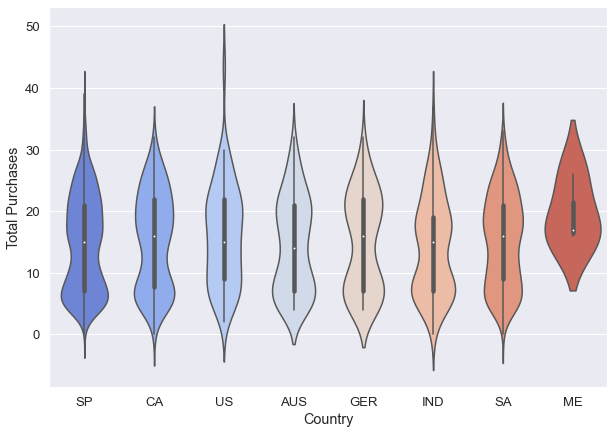

In [31]:
plt.figure(figsize = (10, 7))
sns.violinplot(x = data['Country'], y = data['Total Purchases'], palette = 'coolwarm')

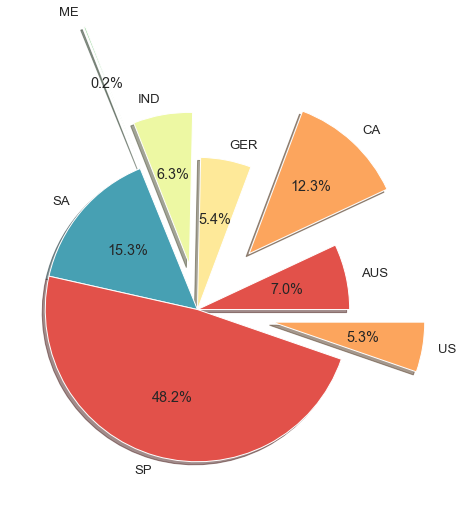

In [32]:
pm = data[['Total Purchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Total Purchases']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),
        shadow = True, autopct = '%1.1f%%')
plt.show()

Text(0, 0.5, 'Enrollments')

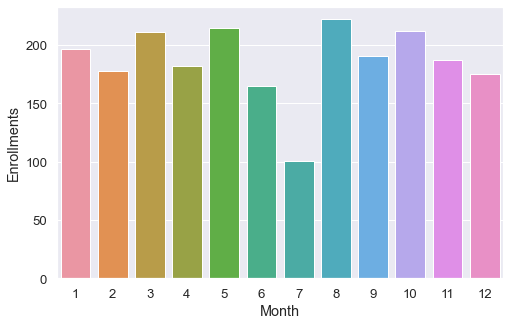

In [33]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data['Dt_Customer'].dt.month)
plt.xlabel('Month')
plt.ylabel('Enrollments')

Text(0, 0.5, 'Enrollments')

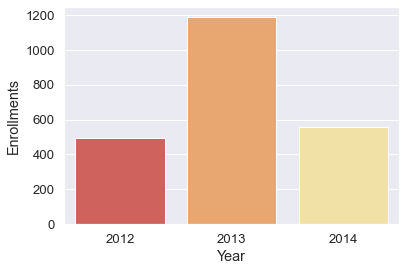

In [34]:
sns.countplot(x = data['Dt_Customer'].dt.year)
plt.xlabel('Year')
plt.ylabel('Enrollments')

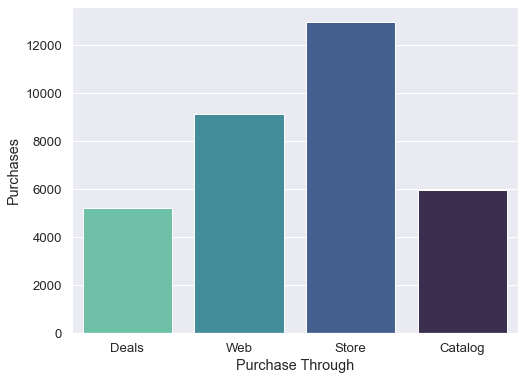

In [35]:
plt.figure(figsize = (8, 6))
tp = data[['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].agg([sum])

sns.barplot(x = tp.T.index, y = tp.T['sum'], palette = 'mako_r')
plt.gca().set_xticklabels(['Deals', 'Web', 'Store', 'Catalog'])
plt.xlabel('Purchase Through')
plt.ylabel('Purchases')
plt.show()

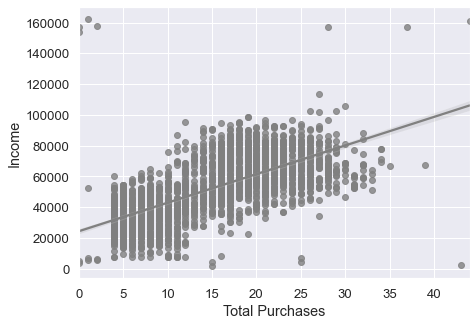

In [36]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['Total Purchases'], y = data['Income'], color = 'grey')

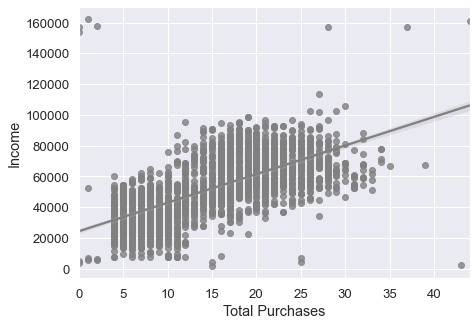

In [37]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['Total Purchases'], y = data['Income'], color = 'grey')

Text(0.5, 0, 'Spent on Wine')

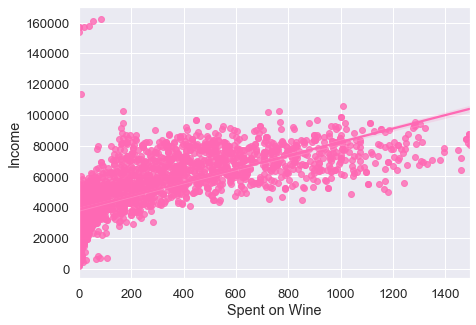

In [38]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['MntWines'], y = data['Income'], color = 'hotpink')
plt.xlabel('Spent on Wine')

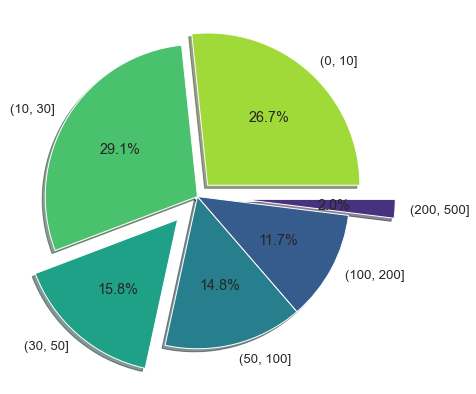

In [39]:
bins = [0, 10, 30, 50, 100, 200, 500]
b = data[['ID']].copy()
b['Gold Bins'] = pd.cut(data['MntGoldProds'], bins = bins)
b = b.groupby('Gold Bins').agg([len])

sns.set_palette('viridis_r')
plt.figure(figsize = (10, 7))
plt.pie(b['ID']['len'], labels = b.index,  explode = (0.1, 0, 0.2, 0, 0, 0.3), shadow = True, autopct = '%1.1f%%')
plt.show()

Text(0, 0.5, 'Amount')

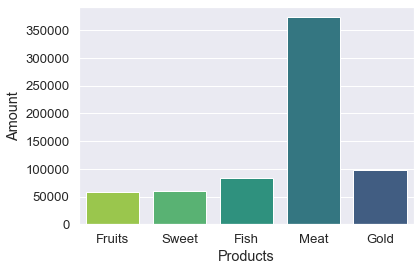

In [40]:
prod = data[['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds']].agg([sum]).T

sns.barplot(x = prod.index, y = prod['sum'])
plt.gca().set_xticklabels(['Fruits', 'Sweet', 'Fish', 'Meat', 'Gold'])
plt.xlabel('Products')
plt.ylabel('Amount')